# Classification - Predict Maintenance Model for Delivery Company

In [1]:
#import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("failure.csv")

In [3]:
# information about the data

In [4]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [6]:
df.sample(5)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
43539,2015-02-27,W1F0P2TN,0,211633408,0,0,0,12,313844,0,0,0
34309,2015-02-14,S1F0F4EB,0,242078696,0,0,0,10,228448,0,0,3
63932,2015-03-31,S1F0LCQX,0,39614064,0,0,0,7,307511,0,0,0
13971,2015-01-16,W1F0KAX2,0,95879320,0,0,0,7,297766,0,0,0
123526,2015-10-15,W1F1354W,0,242564520,0,0,0,8,315768,0,0,1


In [7]:
df.shape

(124494, 12)

In [8]:
df.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [10]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [11]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [12]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [13]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [14]:
abs(df.corr()["failure"].sort_values(ascending=False))

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute6    0.000550
attribute3    0.000948
Name: failure, dtype: float64

In [15]:
df.date.value_counts()

2015-01-01    1163
2015-01-02    1163
2015-01-03    1163
2015-01-04    1162
2015-01-05    1161
              ... 
2015-10-27      31
2015-10-29      31
2015-10-30      31
2015-10-31      31
2015-11-02      31
Name: date, Length: 304, dtype: int64

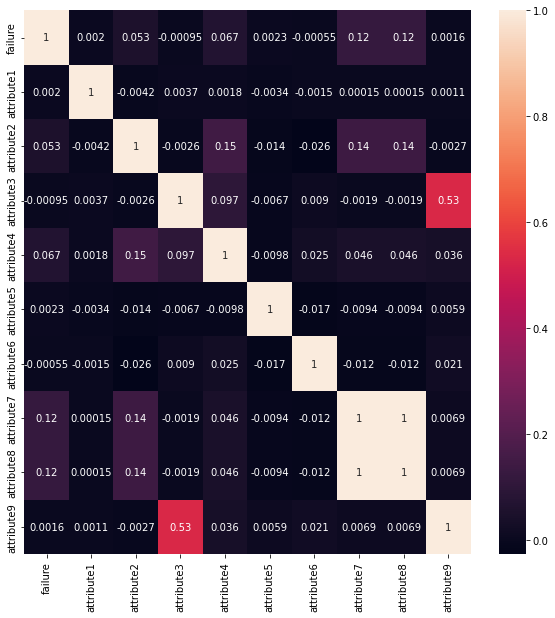

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

In [17]:
df["attribute7"].value_counts().sum()

124494

In [18]:
df["attribute8"].value_counts().sum()

124494

In [19]:
# we can see in the last two lines and heatmap that attribute 7 and 8 have the same values

In [20]:
df.drop(["attribute8"],axis=1,inplace=True)

In [21]:
# we assume that date and device columns have not an impact on our prediction
del df["date"]
del df["device"]

In [22]:
df.sample(5)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
2879,0,240240472,0,0,6,4,326089,8,1
114013,0,217830080,0,0,0,18,58,0,0
90198,0,69880152,0,0,0,7,273872,0,0
49701,0,63672016,0,0,0,11,214828,0,1
102683,0,225599048,0,0,0,9,267530,0,9


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   failure     124494 non-null  int64
 1   attribute1  124494 non-null  int64
 2   attribute2  124494 non-null  int64
 3   attribute3  124494 non-null  int64
 4   attribute4  124494 non-null  int64
 5   attribute5  124494 non-null  int64
 6   attribute6  124494 non-null  int64
 7   attribute7  124494 non-null  int64
 8   attribute9  124494 non-null  int64
dtypes: int64(9)
memory usage: 8.5 MB


In [24]:
### EDA - Exploratory Data Analysis

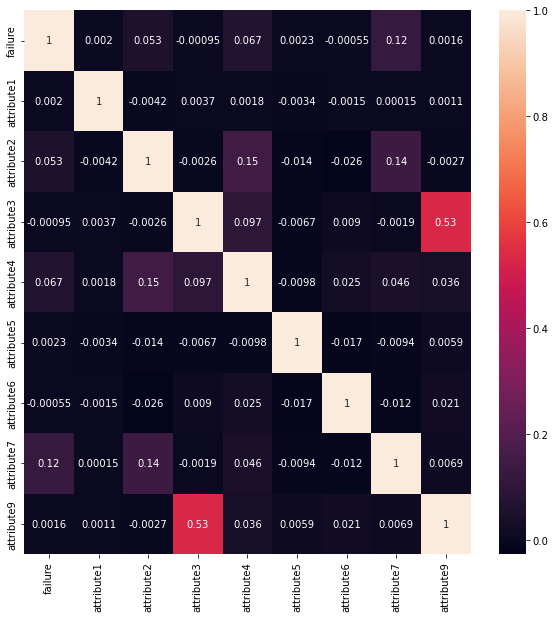

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

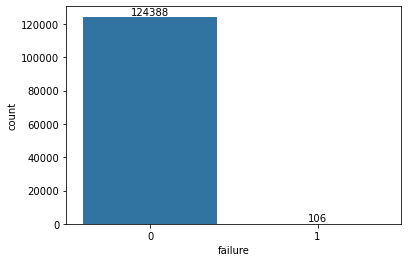

In [26]:
ax=sns.countplot(x=df["failure"])
ax.bar_label(ax.containers[0]);

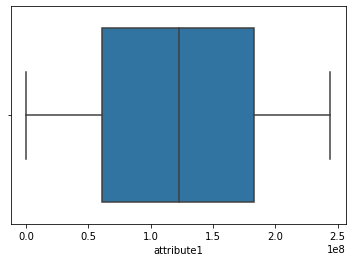

In [27]:
sns.boxplot(x=df["attribute1"]);

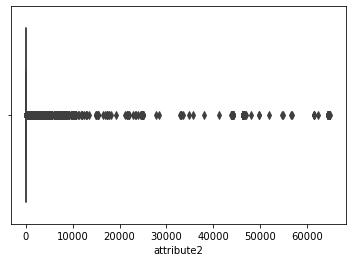

In [28]:
sns.boxplot(x=df["attribute2"]);

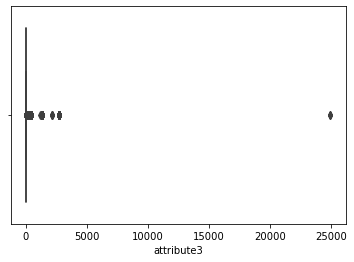

In [29]:
sns.boxplot(x=df["attribute3"]);

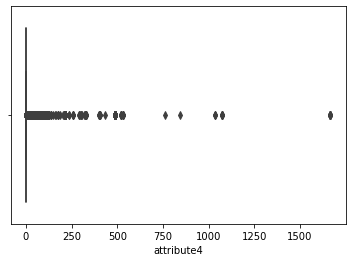

In [30]:
sns.boxplot(x=df["attribute4"]);

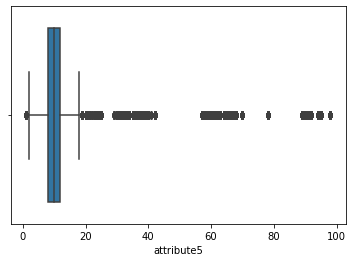

In [31]:
sns.boxplot(x=df["attribute5"]);

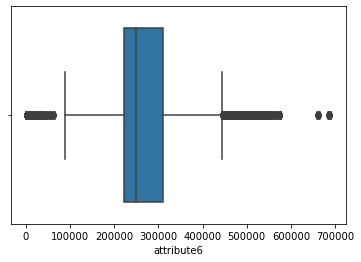

In [32]:
sns.boxplot(x=df["attribute6"]);

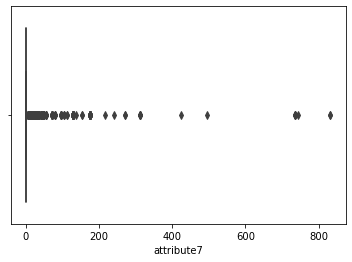

In [33]:
sns.boxplot(x=df["attribute7"]);

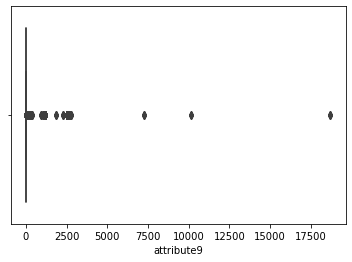

In [34]:
sns.boxplot(x=df["attribute9"]);

In [35]:
df[["failure"]]

,failure
0,0
1,0
2,0
3,0
4,0
...,...
124489,0
124490,0
124491,0
124492,0


In [37]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [38]:
# we have very few amount of "1" in comparison to "0" in the failure column, so we have imbalanced data
#majority negative, minority positive

In [39]:
x = df.drop("failure",axis=1)
y = df[["failure"]]

In [40]:
x.shape, y.shape

((124494, 8), (124494, 1))

In [41]:
x.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,215630672,56,0,52,6,407438,0,7
1,61370680,0,3,0,6,403174,0,0
2,173295968,0,0,0,12,237394,0,0
3,79694024,0,0,0,6,410186,0,0
4,135970480,0,0,0,15,313173,0,3


In [42]:
y.sample(5)

,failure
24565,0
65933,0
34884,0
95390,0
14812,0


In [43]:
x.sample(5)

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
9274,205894968,0,0,0,12,228704,0,0
119441,7218792,0,0,0,12,524863,0,0
45396,234565424,0,0,0,9,418221,0,0
5372,123137696,1552,0,0,12,187021,0,0
64026,135517176,0,0,0,8,237698,0,0


In [44]:
y.value_counts()

failure
0          124388
1             106
dtype: int64

### Handle Imbalanced Datasets
* Random Under- or Oversampling 


In [45]:
#pip install -U imbalanced-learn

In [46]:
#pip install Tensorflow

In [47]:
#pip install imblearn 

In [48]:
#pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

In [49]:
#pip install --upgrade scikit-learn

In [50]:
from imblearn.under_sampling import TomekLinkstl 
undersample = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

ImportError: cannot import name 'TomekLinkstl' from 'imblearn.under_sampling' (C:\Users\Kemal\anaconda3\lib\site-packages\imblearn\under_sampling\__init__.py)

In [ ]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

In [ ]:
'''
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)
''';

In [51]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [53]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
RUS=RandomUnderSampler(random_state=42)
x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)

In [54]:
RUS.fit(x_RUS,y_RUS)

RandomUnderSampler(random_state=42)

In [55]:
predRUS=RUS.predict(x_RUS)

AttributeError: 'RandomUnderSampler' object has no attribute 'predict'

In [ ]:
# Function for Classification Algorithms

In [56]:
def classification_funct(x,y):
    #import classification algos
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    from sklearn.ensemble import GradientBoostingClassifier
    
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
    
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    #import imblearn because our dataset is imbalanced
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
    
    algos=[g,b,KN,SVC,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    RUS=RandomUnderSampler(random_state=42)
    x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)
    
    for item in algos:

        predict=item.fit(x_RUS,y_RUS).predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)  

In [57]:
classification_funct(x,y)

,accuracy_score,f1_score,recall_score,precision_score
GaussianNB,0.990803,0.033755,0.222222,0.018265
LogisticRegression,0.900197,0.008775,0.611111,0.004419
BernoulliNB,0.885216,0.009702,0.777778,0.004881
XGBClassifier,0.835214,0.006297,0.722222,0.003162
RandomForestClassifier,0.824129,0.005451,0.666667,0.002737
GradientBoostingClassifier,0.816258,0.005651,0.722222,0.002837
DecisionTreeClassifier,0.789510,0.004558,0.666667,0.002287
SVC,0.628740,0.001081,0.277778,0.000541
KNeighborsClassifier,0.469256,0.001662,0.611111,0.000832
